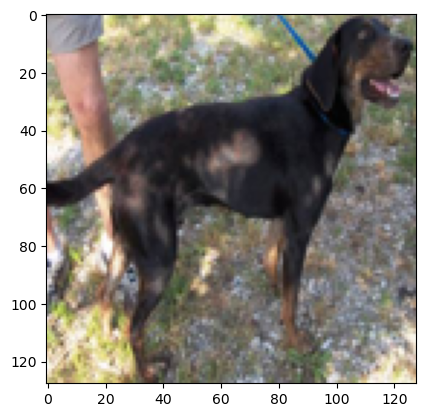

In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from PIL import Image

import matplotlib.pyplot as plt
import random
import numpy as np
import os

#data path
base_dir = './datas/dogcat/train/'
dog_dir = os.path.join(base_dir, 'dog')
cat_dir = os.path.join(base_dir, 'cat')

#hyperparameter
IMG_SIZE = (128, 128)
SAMPLE_SIZE = 1250

def load_images_from_folder(folder, label, sample_size):
    images = []
    filenames = os.listdir(folder)
    random.shuffle(filenames)
    for filename in filenames[:sample_size]:
        img_path = os.path.join(folder, filename)
        img = Image.open(img_path).resize(IMG_SIZE)
        img_array = np.array(img)/255.0
        images.append((img_array, label))
    return images

dog_images = load_images_from_folder(dog_dir, 1, SAMPLE_SIZE)
cat_images = load_images_from_folder(cat_dir, 0, SAMPLE_SIZE)

data = dog_images + cat_images
random.shuffle(data)

#*: unpacking operator, divides label and image
x, y = zip(*data)
x = np.array(x)
y = np.array(y)

plt.imshow(x[1])
plt.show()

In [30]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state = 42)
model = models.Sequential([
    layers.Input(shape=(128, 128, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss= 'binary_crossentropy',
              metrics=['accuracy'])
MODEL_DIR = './model/dogcat/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
modelpath="./model/dogcat/{epoch:02d}-{val_loss:.4f}-{val_accuracy:.4f}.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=False)
early_stopping_callback = EarlyStopping(patience=5)
history=model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=32, shuffle=True, verbose=1, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 625ms/step - accuracy: 0.5323 - loss: 0.6913
Epoch 1: saving model to ./model/dogcat/01-0.6882-0.5100.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 45s 685ms/step - accuracy: 0.5321 - loss: 0.6914 - val_accuracy: 0.5100 - val_loss: 0.6882
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - accuracy: 0.5396 - loss: 0.6876
Epoch 2: saving model to ./model/dogcat/02-0.6922-0.5100.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 35s 562ms/step - accuracy: 0.5398 - loss: 0.6876 - val_accuracy: 0.5100 - val_loss: 0.6922
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 0.5652 - loss: 0.6835
Epoch 3: saving model to ./model/dogcat/03-0.6795-0.5200.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 472ms/step - accuracy: 0.5652 - loss: 0.6835 - val_accuracy: 0.5200 - val_loss: 0.6795
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step - accuracy: 0.5797 - loss: 0.6749
Epoch 4: saving model to ./model/dogcat/04-0.7112-0.5060.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 482ms/step - accura

In [31]:
loss, accuracy = model.evaluate(x_val, y_val)
print(f"Validation Loss: {loss}")
print(f"Validation Acc: {accuracy}")

predictions = model.predict(x_val)
predicted_classes = [1 if prob > 0.5 else 0 for prob in predictions]

print("Predicted labels:", predicted_classes[:20])
print("Actual Labels:", y_val[:20])

correct = np.sum(np.array(predicted_classes) == y_val)
incorrect = len(y_val) - correct
accuracy = correct/len(y_val)*100

print(f"Correct: {correct}")
print(f"Wrong: {incorrect}")
print(f"Custom Acc: {accuracy:.2f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.5220 - loss: 1.0015
Validation Loss: 1.0145024061203003
Validation Acc: 0.5180000066757202
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step
Predicted labels: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Actual Labels: [0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1]
Correct: 259
Wrong: 241
Custom Acc: 51.80
